In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Acc_ML/plan_5" 

/content/drive/MyDrive/Acc_ML/plan_5


In [4]:
import pickle
file = open("CLS_data.pkl", "rb")
output = pickle.load(file)
file1 = open("./LDA/營業收入淨額_lda_data.pkl", "rb") # 改
output1 = pickle.load(file1)

In [5]:
import numpy as np
new_output = {}
for index, value in output1.items():
    bert_x = output[index]['x']
    new_output[index] = {'x': np.append(bert_x, value['x']), 'y': value['y']}

In [6]:
label = []
x = []
y = []
for index, value in new_output.items():
    label.append(index)
    x.append(value['x'])
    y.append(value['y'])

In [7]:
import random
random.seed(87)
random.shuffle(label)
random.seed(87)
random.shuffle(x)
random.seed(87)
random.shuffle(y)

In [8]:
x = np.array(x)
y = np.array(y)
label = np.array(label)

# SVC

In [9]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.svm import SVC
from tqdm import tqdm

acc = []
f1 = []
precision = []
recall = []
roc = []
kf = KFold(n_splits=10, random_state=4, shuffle=True)
for train_index, test_index in tqdm(kf.split(x)):
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    label_train, label_test = label[train_index], label[test_index]
    
    SVM_linear_model = SVC(kernel='linear', C=1.0, probability=True, random_state = 4)
    SVM_linear_model.fit(X_train, Y_train)
    y_pred = []
    y_pred.extend(SVM_linear_model.predict(X_test))
    acc.append(metrics.accuracy_score(Y_test, np.array(y_pred)))
    f1.append(metrics.f1_score(Y_test, np.array(y_pred), pos_label='1'))
    precision.append(metrics.precision_score(Y_test, np.array(y_pred), pos_label='1'))
    recall.append(metrics.recall_score(Y_test, np.array(y_pred), pos_label='1'))
    roc.append(metrics.roc_auc_score(Y_test, np.array(y_pred)))

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
1it [02:26, 146.20s/it]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
2it [04:52, 146.53s/it]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 a

In [10]:
print('acc = ' , np.average(acc) , ', f1 = ' , np.average(f1) , ', precision = ' , np.average(precision) , ', recall = ' , np.average(recall), ', roc = ' , np.average(roc))

acc =  0.7075801343843038 , f1 =  0.7062186592263149 , precision =  0.7113936759804056 , recall =  0.7018715521332933 , roc =  0.7074705863038402


# Random Forest

In [11]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

acc2 = []
f12 = []
precision2 = []
recall2 = []
roc2 = []
kf = KFold(n_splits=10, random_state=4, shuffle=True)
for train_index, test_index in tqdm(kf.split(x)):
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    label_train, label_test = label[train_index], label[test_index]
    
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 4)
    rf.fit(X_train, Y_train)
    y_pred_rf = []
    y_pred_rf.extend(rf.predict(X_test))
    acc2.append(metrics.accuracy_score(Y_test, y_pred_rf))
    f12.append(metrics.f1_score(Y_test, y_pred_rf, pos_label='1'))
    precision2.append(metrics.precision_score(Y_test, y_pred_rf, pos_label='1'))
    recall2.append(metrics.recall_score(Y_test, y_pred_rf, pos_label='1'))
    roc2.append(metrics.roc_auc_score(Y_test, y_pred_rf))

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
1it [02:16, 136.00s/it]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
2it [04:33, 136.84s/it]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 a

In [12]:
print('acc = ' , np.average(acc2) , ', f1 = ' , np.average(f12) , ', precision = ' , np.average(precision2) , ', recall = ' , np.average(recall2), ', roc = ' , np.average(roc2))

acc =  0.7205514433986713 , f1 =  0.7275404525654524 , precision =  0.7108555905551379 , recall =  0.745632452481564 , roc =  0.7204213838133744


# Logistic Regression 

In [13]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import linear_model
from tqdm import tqdm

acc3 = []
f13 = []
precision3 = []
recall3 = []
roc3 = []
kf = KFold(n_splits=10, random_state=4, shuffle=True)
for train_index, test_index in tqdm(kf.split(x)):
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    label_train, label_test = label[train_index], label[test_index]
    
    model=linear_model.LogisticRegression(random_state = 4)
    model.fit(X_train, Y_train)
    y_pred_model = []
    y_pred_model.extend(model.predict(X_test))
    acc3.append(metrics.accuracy_score(Y_test, y_pred_model))
    f13.append(metrics.f1_score(Y_test, y_pred_model, pos_label='1'))
    precision3.append(metrics.precision_score(Y_test, y_pred_model, pos_label='1'))
    recall3.append(metrics.recall_score(Y_test, y_pred_model, pos_label='1'))
    roc3.append(metrics.roc_auc_score(Y_test, y_pred_model))

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
1it [00:01,  1.59s/it]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logisti

In [14]:
print('acc = ' , np.average(acc3) , ', f1 = ' , np.average(f13) , ', precision = ' , np.average(precision3) , ', recall = ' , np.average(recall3), ', roc = ' , np.average(roc3))

acc =  0.7043823442033337 , f1 =  0.7028245503388857 , precision =  0.708182160932297 , recall =  0.6978712387680334 , roc =  0.7041568662594863


# Vote

In [15]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from tqdm import tqdm

acc4 = []
f14 = []
precision4 = []
recall4 = []
roc4 = []
kf = KFold(n_splits=10, random_state=4, shuffle=True)
for train_index, test_index in tqdm(kf.split(x)):
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    label_train, label_test = label[train_index], label[test_index]

    SVM_linear_model = SVC(kernel='linear', C=1.0, probability=True, random_state = 4)
    SVM_linear_model.fit(X_train, Y_train)
    y_pred = []
    y_pred.extend(SVM_linear_model.predict(X_test))
    
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 4)
    rf.fit(X_train, Y_train)
    y_pred_rf = []
    y_pred_rf.extend(rf.predict(X_test))
    
    model=linear_model.LogisticRegression(random_state = 4)
    model.fit(X_train, Y_train)
    y_pred_model = []
    y_pred_model.extend(model.predict(X_test))

    y_pred_final=[]
    for i in range(len(y_pred)):
        if (int(y_pred[i]) + int(y_pred_rf[i]) + int(y_pred_model[i])) >= 2:
            y_pred_final.append('1')
        else:
            y_pred_final.append('0')
    acc4.append(metrics.accuracy_score(Y_test, y_pred_final))
    f14.append(metrics.f1_score(Y_test, y_pred_final, pos_label='1'))
    precision4.append(metrics.precision_score(Y_test, y_pred_final, pos_label='1'))
    recall4.append(metrics.recall_score(Y_test, y_pred_final, pos_label='1'))
    roc4.append(metrics.roc_auc_score(Y_test, y_pred_final))

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
1it [04:46, 286.02s/it]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

In [16]:
print('acc = ' , np.average(acc4) , ', f1 = ' , np.average(f14) , ', precision = ' , np.average(precision4) , ', recall = ' , np.average(recall4), ', roc = ' , np.average(roc4))

acc =  0.7212587624760592 , f1 =  0.7210753632763361 , precision =  0.7234680029054207 , recall =  0.7192057622800355 , roc =  0.7210700876914542


# 畫出預測圖

In [9]:
label_train_year = []
label_test_year = []
for i in list(label_train):
    year = i[5:]
    label_train_year.append(year)
for i in list(label_test):
    year1 = i[5:]
    label_test_year.append(year1)
    
import pandas as pd
df_test = pd.DataFrame((zip(label_test_year, y_pred)), columns = ['Year', 'Predictions'])  # 改變數名稱

# 出現的年度
uni_year = sorted(list(set(label_test_year)))
uni_year

['101', '102', '103', '104', '105', '106', '107', '108', '109', '110']

In [10]:
yes = []
no = []

for i in uni_year:
    a = len(df_test[(df_test['Year'] == i) &
             (df_test['Predictions'] == '1')])
    yes.append(a)
    b = len(df_test[(df_test['Year'] == i) &
             (df_test['Predictions'] == '0')])
    no.append(b)

result_count = {
    "1": yes,
    "0": no,
}
result_count

{'0': [8, 9, 4, 7, 9, 10, 10, 5, 9, 6], '1': [6, 4, 8, 8, 8, 4, 4, 8, 5, 5]}

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


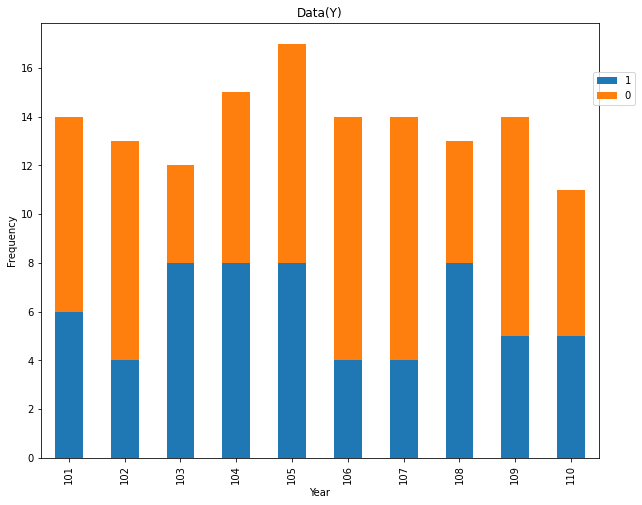

In [11]:
import matplotlib.pyplot as plt
# 各年度資料筆數（按產業區分）
df_result_count = pd.DataFrame(result_count, index=uni_year)
df_result_count.plot(kind="bar", stacked=True, figsize=(10, 8))
plt.legend(loc='lower left', bbox_to_anchor=(0.98, 0.8))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Data(Y)')
fig = plt.gcf()
fig.savefig('./預測圖/Data_營業收入淨額_支持向量機.png', dpi=1024) # 圖片名稱可以自己取